In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/Code/GroupProjectDevops/log6309e-group/src

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/My Drive/Code/GroupProjectDevops/log6309e-group/src'
/content/gdrive/My Drive/Code/GroupProjectDevops/log6309e-group/src


In [6]:
data = np.load('../data/BGL/text-tfidf-template-BGL.log.structured2.npz')
train_x = data['x_train']
train_y = data['y_train']
test_x = data['x_test']
test_y = data['y_test']

In [7]:
train_test_x = np.concatenate((train_x, test_x), axis=0)
train_test_y = np.concatenate((train_y, test_y), axis=0)

In [8]:
print(train_test_x.shape)
print(train_test_y.shape)

(204, 1066)
(204,)


In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = range(0, len(train_test_x[0]))

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(train_test_x, i)
                          for i in range(len(train_test_x[0]))]

print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


      feature           VIF
0           0           NaN
1           1           NaN
2           2           inf
3           3           NaN
4           4           NaN
...       ...           ...
1061     1061  1.079439e+06
1062     1062           NaN
1063     1063           NaN
1064     1064           NaN
1065     1065           inf

[1066 rows x 2 columns]


In [10]:
display(vif_data)

,feature,VIF
0,0,NaN
1,1,NaN
2,2,inf
3,3,NaN
4,4,NaN
...,...,...
1061,1061,1.079439e+06
1062,1062,NaN
1063,1063,NaN
1064,1064,NaN


In [11]:
vif_data_sorted = vif_data.sort_values(by=['VIF'])

Text(0.5, 1.0, 'Original features VIF')

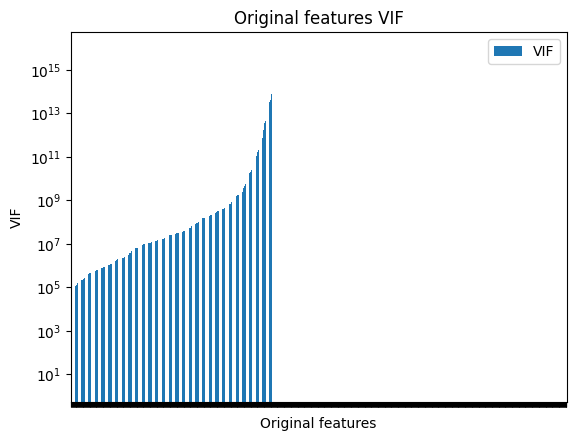

In [12]:
plot = vif_data_sorted.plot(x='feature', y='VIF', kind='bar', logy=True)
plot.set_xticklabels([])
plot.set_xlabel('Original features')
plot.set_ylabel('VIF')
plot.set_title('Original features VIF')

In [13]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
train_test_x.shape

(204, 1066)

In [14]:
lsvc = LinearSVC(C=0.3, penalty="l1", dual=False).fit(train_test_x, train_test_y)
model = SelectFromModel(lsvc, prefit=True)
train_test_x_l1 = model.transform(train_test_x)
train_test_x_l1.shape

(204, 3)

In [15]:
train_test_x_y_l1 = np.concatenate((train_test_x_l1, train_test_y.reshape(-1, 1)), axis=1)
train, test = train_test_split(train_test_x_y_l1, test_size=0.2)
train_test_x_y_l1.shape

(204, 4)

In [16]:
train_l1, test_l1 = train_test_split(train_test_x_y_l1, test_size=0.2)

test_l1_y = test_l1[:, -1:].reshape(-1)
train_l1_y = train_l1[:, -1:].reshape(-1)
test_l1_x = test_l1[:, :-1]
train_l1_x = train_l1[:, :-1]

In [17]:
print(test_l1_y.shape)
print(train_l1_y.shape)
print(test_l1_x.shape)
print(train_l1_x.shape)

(41,)
(163,)
(41, 3)
(163, 3)


In [18]:
print(test_y.shape)
print(train_y.shape)
print(test_x.shape)
print(train_x.shape)

(41,)
(163,)
(41, 1066)
(163, 1066)


In [19]:
# VIF dataframe
vif_data_l1 = pd.DataFrame()
vif_data_l1["feature"] = range(0, len(train_l1[0]))

# calculating VIF for each feature
vif_data_l1["VIF"] = [variance_inflation_factor(train_l1, i)
                          for i in range(len(train_l1[1]))]

print(vif_data_l1)

   feature       VIF
0        0       inf
1        1  1.255059
2        2       inf
3        3  1.904429


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [20]:
vif_data_l1_sorted = vif_data_l1.sort_values(by=['VIF'])

Text(0.5, 1.0, 'Regularized features VIF')

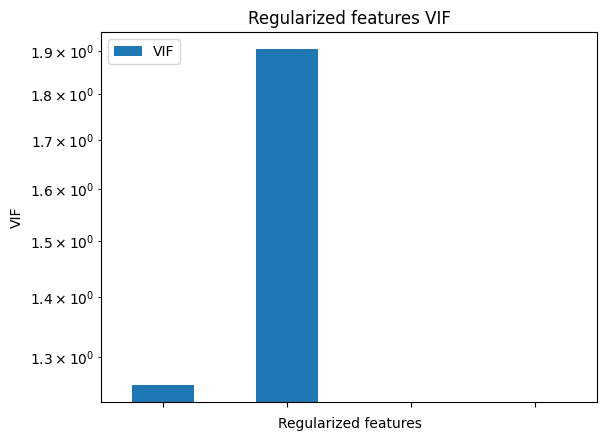

In [21]:
plot = vif_data_l1_sorted.plot(x='feature', y='VIF', kind='bar', logy=True)
plot.set_xticklabels([])
plot.set_xlabel('Regularized features')
plot.set_ylabel('VIF')
plot.set_title('Regularized features VIF')

In [22]:
output_file_path = "../data/BGL/text-tfidf-template-BGL.log.structured2_l1.npz"
np.savez(output_file_path,
          x_train=train_x,
          y_train=train_y,
          x_test=test_x,
          y_test=test_y,
          x_train_l1=train_l1_x,
          y_train_l1=train_l1_y,
          x_test_l1=test_l1_x,
          y_test_l1=test_l1_y)